In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [5]:
import pandas as pd
import io
titanic = pd.read_csv(io.BytesIO(uploaded['titanic.csv']))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
titanic.drop('Cabin', axis = 1, inplace = True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic_clean = titanic.dropna(subset=['Age'])

<ipython-input-10-1538537027>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [15]:
titanic_clean.loc[:, 'FamilySize'] = titanic_clean['SibSp'] + titanic_clean['Parch']
titanic_clean.loc[:, 'TravelAlone'] = titanic_clean['FamilySize'] == 0
titanic_clean[['SibSp', 'Parch', 'FamilySize', 'TravelAlone']].head()

,SibSp,Parch,FamilySize,TravelAlone
0,1,0,1,False
1,1,0,1,False
2,0,0,0,True
3,1,0,1,False
4,0,0,0,True


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


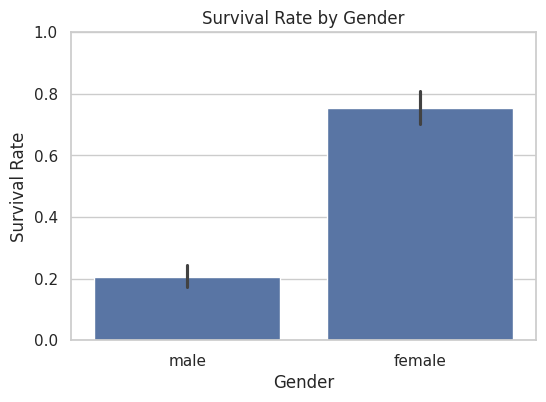

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize = (6,4))
sns.barplot(x="Sex", y = "Survived", data = titanic_clean)

plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.ylim(0,1)
plt.show()

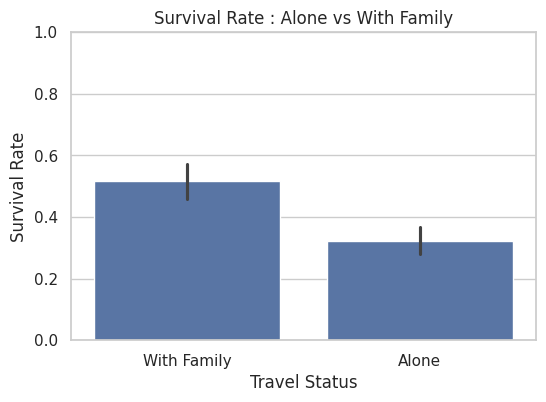

In [22]:
plt.figure(figsize = (6,4))
titanic_clean.loc[:, 'TravelStatus']=titanic_clean['TravelAlone'].map({True: 'Alone', False: 'With Family'})
sns.barplot(x = "TravelStatus", y= "Survived", data=titanic_clean)
plt.title("Survival Rate : Alone vs With Family")
plt.xlabel("Travel Status")
plt.ylabel("Survival Rate")
plt.ylim(0,1)
plt.show()

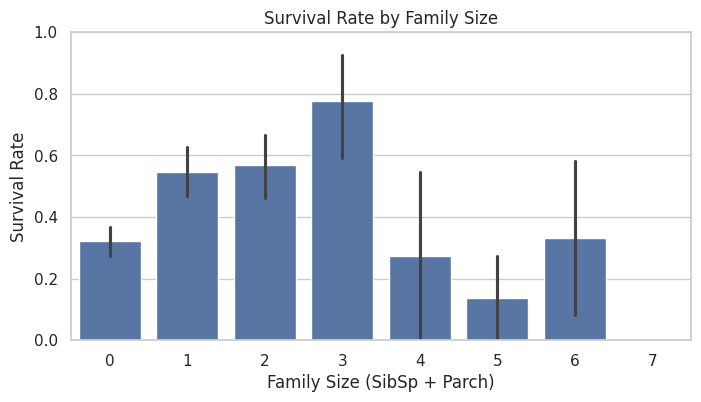

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x="FamilySize", y="Survived", data=titanic_clean)

plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size (SibSp + Parch)")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()